In [47]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from pandas import datetime
from random import random
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
import math
from numpy import array
warnings.filterwarnings('ignore')
data = pd.read_csv('/Users/alket/Desktop/dati/new_data_backfill_forwfill.csv',index_col = 0)

gbc = data.groupby(by = data['cell_num'])
cell_1 = gbc.get_group('486-1258')
cell_1 = cell_1.iloc[::4, :]
series1 = cell_1['nr_people'].values

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
         # find the end of this pattern
         end_ix = i + n_steps_in
         out_end_ix = end_ix + n_steps_out
         # check if we are beyond the sequence
         if out_end_ix > len(sequence):
             break
         # gather input and output parts of the pattern
         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
         X.append(seq_x)
         y.append(seq_y)
    return np.array(X), np.array(y)

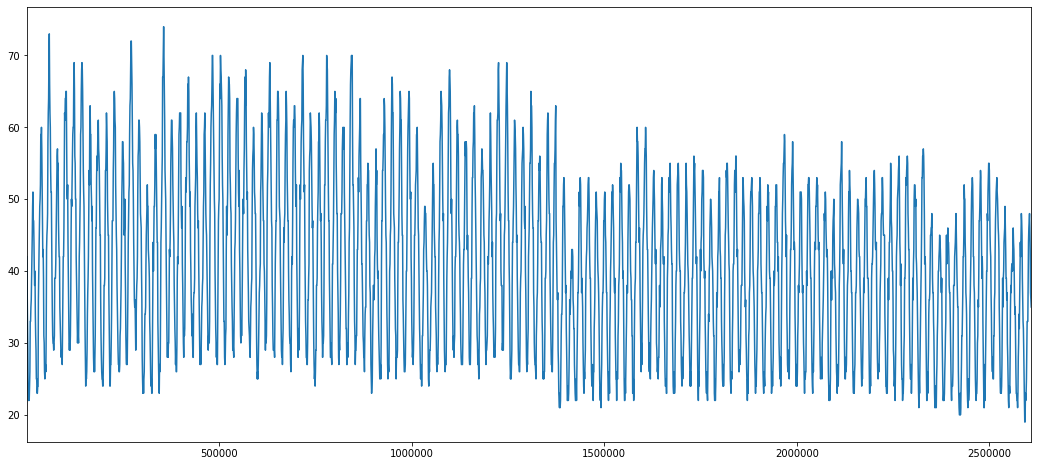

In [87]:
plt.figure(figsize = (18, 8))
cell_1['nr_people'].plot()
plt.show()

In [88]:
# one-step Holt Winters Exponential Smoothing forecast
def exp_smoothing_forecast(history, config): 
    t,d,s,p,b,r = config
    model = ExponentialSmoothing(history, trend=t, damped=d, seasonal=s, seasonal_periods=p)
    
    # fit model
    model_fit = model.fit(optimized=True, use_boxcox=b, remove_bias=r)
    
    #  make one step forecast
    yhat = model_fit.predict(len(history), len(history)) 
    return yhat[0]

  

In [89]:
step_in, step_out = 2780, 24
X, y = split_sequence(series1, step_in, step_out)
print(X.shape)

(149, 2780)


In [113]:

#cfg_par = ['mul', True, 'add', 6, False, False]
cfg_par = [None, False, 'add', 24, False, False]
#cfg_par = [None, False, 'mul', 24, False, False]
yHat = []
expected = []
#step_forward =[ 910, 1820, 2730, 3
for k in range(len(X)):
    print(len(X))
    print(len(X[k]))
    print(k)
    predictions = []
    
    history = X[k]
    print(history[:10])
    for i in range(len(y[i])):
       
        yhat = exp_smoothing_forecast(history, cfg_par)
        predictions.append(yhat)
        history = np.append(history, y[i])
        
    expected.append(y[k])
    yHat.append(predictions)
    

149
2780
0
[42. 37. 33. 29. 23. 22. 23. 22. 24. 26.]
149
2780
1
[37. 33. 29. 23. 22. 23. 22. 24. 26. 33.]
149
2780
2
[33. 29. 23. 22. 23. 22. 24. 26. 33. 33.]
149
2780
3
[29. 23. 22. 23. 22. 24. 26. 33. 33. 35.]
149
2780
4
[23. 22. 23. 22. 24. 26. 33. 33. 35. 36.]
149
2780
5
[22. 23. 22. 24. 26. 33. 33. 35. 36. 39.]
149
2780
6
[23. 22. 24. 26. 33. 33. 35. 36. 39. 42.]
149
2780
7
[22. 24. 26. 33. 33. 35. 36. 39. 42. 45.]
149
2780
8
[24. 26. 33. 33. 35. 36. 39. 42. 45. 49.]
149
2780
9
[26. 33. 33. 35. 36. 39. 42. 45. 49. 51.]
149
2780
10
[33. 33. 35. 36. 39. 42. 45. 49. 51. 47.]
149
2780
11
[33. 35. 36. 39. 42. 45. 49. 51. 47. 47.]
149
2780
12
[35. 36. 39. 42. 45. 49. 51. 47. 47. 44.]
149
2780
13
[36. 39. 42. 45. 49. 51. 47. 47. 44. 40.]
149
2780
14
[39. 42. 45. 49. 51. 47. 47. 44. 40. 38.]
149
2780
15
[42. 45. 49. 51. 47. 47. 44. 40. 38. 40.]
149
2780
16
[45. 49. 51. 47. 47. 44. 40. 38. 40. 34.]
149
2780
17
[49. 51. 47. 47. 44. 40. 38. 40. 34. 31.]
149
2780
18
[51. 47. 47. 44. 40. 38. 4

In [110]:
yHat = np.array(yHat)

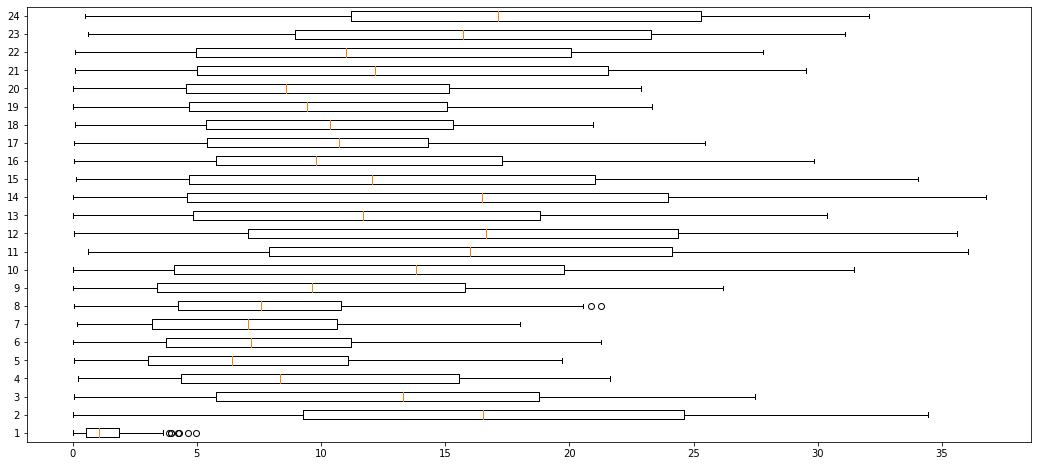

In [111]:
expected = np.array(expected)
error = abs(expected - yHat)
plt.figure(figsize = (18, 8))
plt.boxplot(error, vert = False)
plt.show()

In [112]:
e = np.mean(error)
e

11.685794863029027